In [65]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from matplotlib.image import imread
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


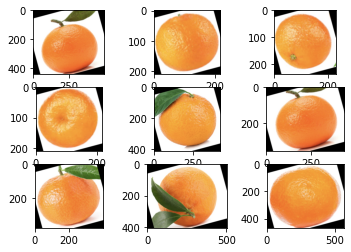

In [66]:

folder= '/content/drive/MyDrive/fruit/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'freshorange'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()
photos, labels = list(), list()

In [67]:
def plot_history(history_fine):
  f1 = history_fine.history['accuracy']

  loss = history_fine.history['loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

In [68]:
for file in listdir(folder):
  if file.startswith('apple'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('banana'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('freshorange'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('rottenorange'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

In [69]:
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

(409, 200, 200, 3) (409,)


In [70]:
save('kindoforange_photos.npy', photos)
save('kindoforange_labels.npy', labels)

In [71]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 25, 25, 128)     

In [72]:
 history = model.fit(photos, labels, epochs=50, verbose=1)

13/13 [==============================] - 1s 44ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 44/50
13/13 [==============================] - 1s 44ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 45/50
13/13 [==============================] - 1s 45ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 46/50
13/13 [==============================] - 1s 44ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 47/50
13/13 [==============================] - 1s 44ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 48/50
13/13 [==============================] - 1s 44ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 49/50
13/13 [==============================] - 1s 44ms/step - loss: 9.8529e-04 - accuracy: 1.0000
Epoch 50/50
13/13 [==============================] - 1s 44ms/step - loss: 9.6068e-04 - accuracy: 1.0000


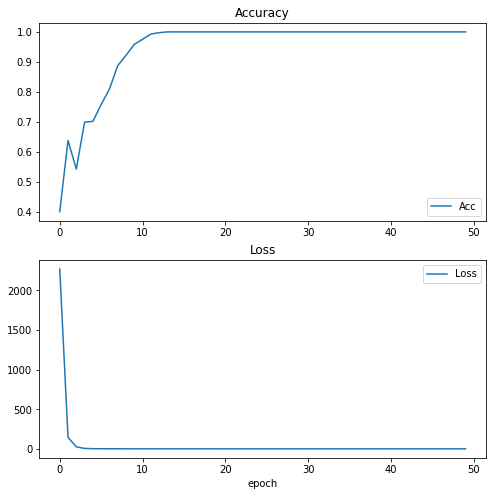

In [73]:
plot_history(history)

In [74]:
model.evaluate(photos,labels)

13/13 [==============================] - 0s 25ms/step - loss: 9.0213e-04 - accuracy: 1.0000


[0.0009021306759677827, 1.0]

In [75]:
model.save('Kindoforange_Final.h5')

In [76]:
from keras.models import load_model
models=load_model('Kindoforange_Final.h5')

In [77]:
classes = ["Tao","Chuoi","Cam tuoi", "Cam hu"]

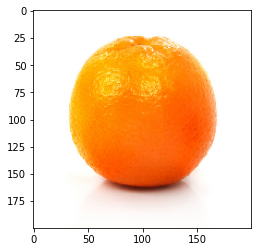

In [78]:
img = load_img('orange.jpg', target_size=(200,200))
plt.imshow(img)

In [79]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.15434189 0.09001564 0.1605397  0.14680058 0.06720313 0.06537779
  0.07607806 0.1175686  0.08397111 0.03810346]]


'Cam tuoi'

In [80]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [81]:
parameters = cv2.aruco.DetectorParameters_create()
aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_5X5_50)

In [82]:
class HomogeneousBgDetector():
    

    def detect_objects(self, frame):
        # Convert Image to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Create a Mask with adaptive threshold
        mask = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 19, 5)

        # Find contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

     
        objects_contours = []

        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > 2000:
            
                objects_contours.append(cnt)

        return objects_contours

In [83]:
detector = HomogeneousBgDetector()

In [84]:
img = cv2.imread("1.jpg")

In [85]:
corners, _, _ = cv2.aruco.detectMarkers(img, aruco_dict, parameters=parameters)


In [86]:
int_corners = np.int0(corners)
cv2.polylines(img, int_corners, True, (0, 300, 0), 5,)

array([[[156, 161, 160],
        [156, 161, 160],
        [157, 162, 161],
        ...,
        [159, 165, 160],
        [159, 165, 160],
        [159, 165, 160]],

       [[156, 161, 160],
        [156, 161, 160],
        [157, 162, 161],
        ...,
        [159, 165, 160],
        [159, 165, 160],
        [159, 165, 160]],

       [[156, 161, 160],
        [156, 161, 160],
        [157, 162, 161],
        ...,
        [158, 164, 159],
        [158, 164, 159],
        [158, 164, 159]],

       ...,

       [[158, 158, 158],
        [158, 158, 158],
        [158, 158, 158],
        ...,
        [132, 137, 136],
        [132, 137, 136],
        [132, 137, 136]],

       [[158, 158, 158],
        [158, 158, 158],
        [158, 158, 158],
        ...,
        [132, 137, 136],
        [132, 137, 136],
        [132, 137, 136]],

       [[158, 158, 158],
        [158, 158, 158],
        [158, 158, 158],
        ...,
        [132, 137, 136],
        [132, 137, 136],
        [132, 137, 136]]

In [87]:
aruco_meter = cv2.arcLength(corners[0], True)

In [88]:
pixel_cm_ratio = aruco_meter / 20
contours = detector.detect_objects(img)

In [89]:
for cnt in contours:
    # Get rect
    rect = cv2.minAreaRect(cnt)
    (x, y), (w, h), angle = rect

    # Get Width and Height of the Objects by applying the Ratio pixel to cm
    object_width = w / pixel_cm_ratio
    object_height = h / pixel_cm_ratio

    # Display rectangle
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    cv2.circle(img, (int(x), int(y)), 5, (0, 0, 255), -1)
    cv2.polylines(img, [box], True, (255, 0, 0), 2)
    cv2.putText(img, "Width {} cm".format(round(object_width, 1)), (int(x - 100), int(y - 20)), cv2.FONT_HERSHEY_PLAIN , 2, (100, 200, 0), 2)
    cv2.putText(img, "Height {} cm".format(round(object_height, 1)), (int(x - 100), int(y + 15)), cv2.FONT_HERSHEY_PLAIN , 2, (100, 200, 0), 2)


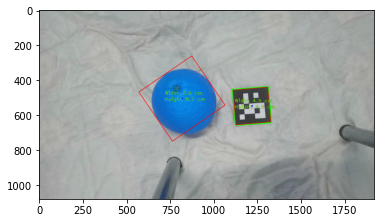

In [90]:
plt.imshow(img)